# Images Classification

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from keras.datasets import fashion_mnist

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

2024-04-02 00:22:14.750823: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-02 00:22:14.751005: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 00:22:14.753274: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 00:22:14.779879: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-02 00:22:15.220273: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

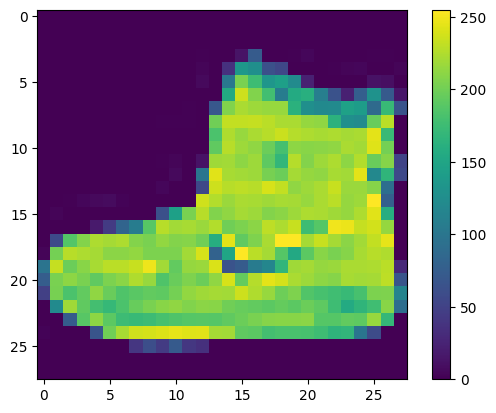

In [2]:
def display_fig(num, train=True):
    plt.figure()
    if train:
        plt.imshow(X_train[num])
    else:
        plt.imshow(X_test[num])
    plt.colorbar()
    plt.grid(False)
    plt.show()

display_fig(0)

In [3]:
def predictions_summary(model, X, y):
    predictions = model.predict(X)
    not_predicted_sum = 0

    for i in range(len(X)):
        predicted = np.argmax(predictions[i])
        dist = y[i] - predicted
        if dist != 0:
            not_predicted_sum += 1

    print(f"- unpredicted: {not_predicted_sum} - over: {len(X)}")

In [4]:
# Pre-processing data to range between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

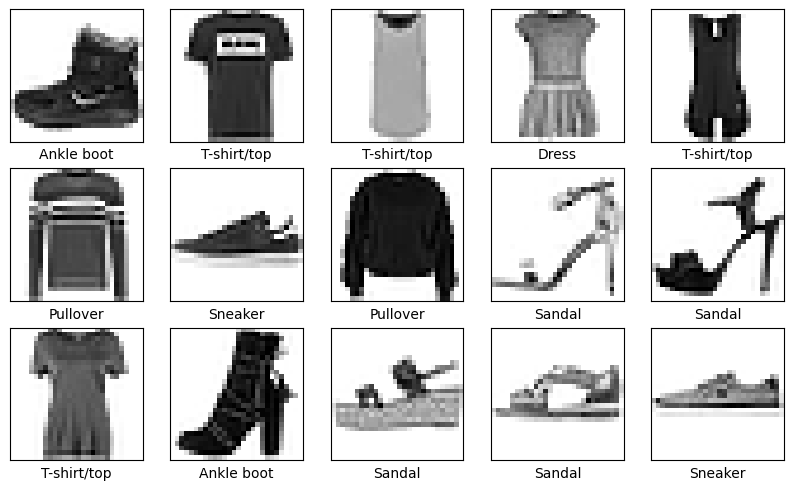

In [5]:
plt.figure(figsize=(10,10))
for i in range(5*3):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
    
plt.show()


In [6]:
# Model creation
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/home/kodascii/.local/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7849 - loss: 0.6183
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8619 - loss: 0.3867
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8709 - loss: 0.3468
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8858 - loss: 0.3115
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8909 - loss: 0.2993
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8964 - loss: 0.2834
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8998 - loss: 0.2721
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9050 - loss: 0.2557
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9066 - loss: 0.2476
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9101 - loss: 0.2383


In [9]:
# Model evaluation
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

313/313 - 0s - 940us/step - accuracy: 0.8815 - loss: 0.3372


In [10]:
# Converting the model's linear outputs (logits) to probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [11]:
predictions = probability_model.predict(X_test)

# Example on 12th element:
pred12 = np.argmax(predictions[11])
print(f"{{ predicted: {class_names[pred12]}, real: {class_names[y_test[11]]} }}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step
{ predicted: Sandal, real: Sandal }
